<h2>Demo av folium/leaflet</h2>

Aktiver cellene under, og start et kartsøk til slutt.

In [14]:
!pip install opencage

In [15]:
import pgeocode as pgeo

In [16]:
from collections import Counter
import folium
from folium.plugins import MarkerCluster
import dhlab.nbtext as nb
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [17]:
import qgrid as qg
import dhlab.token_map as tm
import ipywidgets as widgets
%matplotlib inline

In [18]:
from opencage.geocoder import OpenCageGeocode

# apinøkkel for opencage (men data er lastet ned, så den vil stort sett ikke benyttes)

opencage_api = "a8e2de88b5b64323a9b7668a0ee6e7b6"
geocoder = OpenCageGeocode(opencage_api)

def place_info(place, geo = geocoder):
    query = place  
    results = geo.geocode(query)
    return results

def koord(sted):
    coords = place_info(sted)[0]['geometry']
    return coords['lat'], coords['lng']

# kode for det norske kartverket sine data

def finnsted(sted):
    r = requests.get("https://ws.geonorge.no/SKWS3Index/ssr/sok", params = {'navn': sted})
    return r.text

    
# generer folium kart fra steder, et sted er en dict på formen {navn: [lat, long], navn2: [lat2, long2], ....}


def geokart(steder, limit=50):
    """ dict of places: {place: [lat, lng], ...} """
    import numpy as np
    
    #lat, lon = koord(sted)
    kartsnitt = folium.Map(location=[60, 10], zoom_start = 6)
    locs = []
    pops = []
    geo_tags = list(steder.values())
    geo_name = list(steder.keys())
    #folium.Marker(sted[1], popup = sted[0], icon=folium.Icon(icon='cloud')).add_to(kartsnitt)
    kartsnitt.add_child(MarkerCluster(geo_tags, popups = geo_name))
    #print(locs)
    return kartsnitt

def geokart_distinct(steder, limit=50):
    """ dict of places: {place: [lat, lng], ...} """
    import numpy as np
    
    #lat, lon = koord(sted)
    kartsnitt = folium.Map(location=[60, 10], zoom_start = 6)
    for item in steder:
        kartsnitt.add_child(MarkerCluster([steder[item]], popups=[item]))
    #print(locs)
    return kartsnitt


def geokart_circles(steder, weights, name = 'alle', color ='#2244AA', radius = 100000, thickness = 10):
    """ dict of places: {place: [lat, lng], ...} """
    import numpy as np
    group = folium.FeatureGroup(name=name)
    #lat, lon = koord(sted)
    kartsnitt = folium.Map(location=[60, 10], zoom_start = 6)
    for item in steder:
        if item in weights:
            w = weights[item]
        else:
            w = min(weights.values())
        folium.Circle(location=steder[item]['latlong'], radius = w*radius,
                    popup = item,
                    color = color, weight= thickness, fill = False).add_to(group)
    kartsnitt.add_child(group)
    #folium.LayerControl().add_to(kartsnitt)
    #print(locs)
    return kartsnitt

def add_layer(steder, kart,  weights, name, color = 'red', thickness = 10, radius=100000):
    group = folium.FeatureGroup(name=name)
    for item in steder:
        if item in weights:
            w = weights[item]
        else:
            w = min(weights.values())
        folium.Circle(location=steder[item]['latlong'], radius = w*radius,
                    popup = item, line_color = color,
                    color = color, fill = False, weight=thickness).add_to(group)
    group.add_to(kart)
    #folium.LayerControl().add_to(kart)
    return kart

def geokart_add(kartsnitt, sted):
    lat, lon = koord(sted)
    #kartsnitt = folium.Map(location=[lat, lon], zoom_start = 6)
    locs = []
    pops = []
    #folium.Marker(sted[1], popup = sted[0], icon=folium.Icon(icon='cloud')).add_to(kartsnitt)
    kartsnitt.add_child(MarkerCluster([[lat,lon]], popups=[sted]))
    #print(locs)
    return kartsnitt



# Henter inn navnene

# Lager et kart over alle stedsnavn

In [19]:
def geo_info(n, pi):
    d = pi['components']
    d.update(pi['geometry'])
    d['_name'] = n
    return d

In [20]:
hamsun_all = {'Aabakken': 20.0,
 'Aas': 128.0,
 'Afrika': 31.0,
 'Amerika': 1104.0,
 'Ananur': 7.0,
 'Argentina': 21.0,
 'Armenia': 7.0,
 'Asien': 22.0,
 'Asker': 29.0,
 'Atlanta': 3.0,
 'Atlanterhavet': 27.0,
 'Aurdal': 155.0,
 'Australien': 33.0,
 'Baku': 40.0,
 'Balberg': 18.0,
 'Baltimore': 1.0,
 'Batum': 6.0,
 'Bayern': 5.0,
 'Belgien': 40.0,
 'Bergen': 426.0,
 'Berlin': 227.0,
 'Bjærget': 38.0,
 'Bodø': 102.0,
 'Bokhara': 15.0,
 'Bolivia': 9.0,
 'Boston': 26.0,
 'Brasil': 2.0,
 'Breidablik': 48.0,
 'Brevik': 6.0,
 'Bryne': 2.0,
 'Byen': 1633.0,
 'Bygdø': 28.0,
 'California': 5.0,
 'Chicago': 72.0,
 'Christiania': 2029.0,
 'Cordilleras': 4.0,
 'Dakota': 19.0,
 'Danmark': 250.0,
 'Danzig': 5.0,
 'Doppen': 209.0,
 'Drammen': 40.0,
 'Drøbak': 82.0,
 'Dubrovnik': 20.0,
 'Egersund': 18.0,
 'Egypten': 23.0,
 'Elverum': 24.0,
 'England': 404.0,
 'Equador': 1.0,
 'Europa': 213.0,
 'Finland': 138.0,
 'Finmarken': 40.0,
 'Fjell': 20.0,
 'Flandern': 2.0,
 'Florø': 4.0,
 'Fosenlandet': 40.0,
 'Frankrike': 143.0,
 'Fredrikstad': 9.0,
 'Fuglværø': 14.0,
 'Gaarden': 713.0,
 'Gaden': 538.0,
 'Ganges': 5.0,
 'Garmo': 17.0,
 'Gaustad': 9.0,
 'Gjørvik': 10.0,
 'Gjøvik': 52.0,
 'Grand_Hotel': 136.0,
 'Grekenland': 19.0,
 'Grimstad': 716.0,
 'Grønland': 67.0,
 'Gudbrandsdalen': 21.0,
 'Guinea': 4.0,
 'Haag': 8.0,
 'Hamar': 17.0,
 'Hamarøy': 346.0,
 'Hammerfest': 5.0,
 'Hamsund': 73.0,
 'Hannover': 55.0,
 'Hardanger': 34.0,
 'Harrow': 12.0,
 'Harstad': 32.0,
 'Haugesund': 12.0,
 'Havet': 213.0,
 'Heia': 23.0,
 'Helsingfors': 117.0,
 'Holmestrand': 10.0,
 'Hornbæk': 25.0,
 'Horten': 12.0,
 'Hønefoss': 5.0,
 'Hørup': 15.0,
 'Indien': 67.0,
 'Indrebygden': 62.0,
 'Italien': 43.0,
 'Japan': 28.0,
 'Jerusalem': 28.0,
 'Jorden': 714.0,
 'Judea': 3.0,
 'Kairo': 1.0,
 'Kanada': 49.0,
 'Kansas': 4.0,
 'Kaukasien': 46.0,
 'Kentucky': 26.0,
 'Kina': 19.0,
 'Kongsberg': 69.0,
 'Konstantinopel': 41.0,
 'Kreml': 5.0,
 'Kristianssand': 52.0,
 'Kristiansund': 66.0,
 'Kvæfjord': 6.0,
 'Kystby': 6.0,
 'København': 621.0,
 'Landvik': 199.0,
 'Larvik': 206.0,
 'Levanger': 16.0,
 'Lillehammer': 33.0,
 'Lillesand': 245.0,
 'Lofoten': 154.0,
 'Lom': 38.0,
 'London': 79.0,
 'Lyon': 6.0,
 'Maaneland': 32.0,
 'Mandal': 4.0,
 'Marken': 531.0,
 'Marseille': 3.0,
 'Mexico': 31.0,
 'Midtvesten': 1.0,
 'Minneapolis': 100.0,
 'Mleti': 6.0,
 'Molde': 11.0,
 'Montana': 3.0,
 'Moskva': 69.0,
 'Munchen': 30.0,
 'Myren': 193.0,
 'Narvik': 20.0,
 'Natal': 14.0,
 'Nationen': 74.0,
 'Nevada': 5.0,
 'New_Orleans': 9.0,
 'New_Zealand': 8.0,
 'Niam-Niam': 1.0,
 'Norden': 101.0,
 'Nordland': 193.0,
 'Norge': 1168.0,
 'Nuten': 15.0,
 'Nørholmen': 1280.0,
 'Odessa': 4.0,
 'Ohio': 10.0,
 'Orienten': 20.0,
 'Ostende': 15.0,
 'Otta': 2.0,
 'Paris': 432.0,
 'Pennsylvania': 1.0,
 'Persien': 23.0,
 'Peru': 4.0,
 'Petersburg': 19.0,
 'Polden': 524.0,
 'Polen': 29.0,
 'Portugal': 6.0,
 'Prærien': 5.0,
 'Quebec': 4.0,
 'Roma': 49.0,
 'Rosengård': 20.0,
 'Rostov': 1.0,
 'Rusland': 202.0,
 'Saba': 41.0,
 'Sagvika': 30.0,
 'Samsø': 36.0,
 'Sarpsborg': 31.0,
 'Segelfoss': 530.0,
 'Sellanraa': 139.0,
 'Serbien': 12.0,
 'Sibir': 9.0,
 'Sirilund': 212.0,
 'Skandinavien': 29.0,
 'Skogen': 609.0,
 'Småbyen': 2.0,
 'Sortehavet': 16.0,
 'Spania': 27.0,
 'Spitsbergen': 5.0,
 'Stavanger': 48.0,
 'Steppen': 21.0,
 'Stockholm': 162.0,
 'Stokmarknes': 20.0,
 'Storborg': 42.0,
 'Stordalen': 13.0,
 'Stortinget': 124.0,
 'Stranden': 3.0,
 'Suezkanalen': 5.0,
 'Sveits': 57.0,
 'Sverige': 217.0,
 'Svolvær': 9.0,
 'Sydafrika': 3.0,
 'Sydamerika': 48.0,
 'Syden': 33.0,
 'Sørlandet': 13.0,
 'Theresegade': 38.0,
 'Tiflis': 58.0,
 'Torahus': 80.0,
 'Toretind': 24.0,
 'Torpelviken': 31.0,
 'Tromsø': 60.0,
 'Trondhjem': 171.0,
 'Tvedestrand': 3.0,
 'Tyrkia': 52.0,
 'Tyskland': 685.0,
 'Ungarn': 12.0,
 'Ura': 23.0,
 'Utvær': 22.0,
 'Vadsø': 5.0,
 'Valdres': 126.0,
 'Vangen': 29.0,
 'Venezia': 2.0,
 'Verden': 1348.0,
 'Vesteraalen': 19.0,
 'Vestfjorden': 17.0,
 'Vladikaukas': 26.0,
 'Vælta': 17.0,
 'Washington': 30.0,
 'Wien': 71.0,
 'Wisconsin': 42.0,
 'Ytrepolden': 17.0,
 'Ødemarken': 22.0,
 'Østen': 71.0}

In [21]:
min(hamsun_all.values())

1.0

In [22]:
hamsun_sak = pd.read_csv('sakprosa_steder.csv')

In [23]:
hamsun_sak.columns = ['sted','frekv']

In [24]:
hamsun_sakprosa = pd.Series(hamsun_sak['frekv'].values,index = hamsun_sak['sted']).to_dict()

In [25]:
hamsun_brev = {'Aas': 118.0,
 'Afrika': 8.0,
 'Amerika': 341.0,
 'Argentina': 2.0,
 'Asien': 5.0,
 'Asker': 29.0,
 'Atlanta': 1.0,
 'Atlanterhavet': 11.0,
 'Aurdal': 147.0,
 'Australien': 6.0,
 'Baku': 6.0,
 'Balberg': 18.0,
 'Batum': 1.0,
 'Bayern': 4.0,
 'Belgien': 17.0,
 'Bergen': 259.0,
 'Berlin': 204.0,
 'Bodø': 61.0,
 'Boston': 6.0,
 'Brasil': 2.0,
 'Brevik': 5.0,
 'Byen': 162.0,
 'Bygdø': 27.0,
 'California': 3.0,
 'Chicago': 38.0,
 'Christiania': 1812.0,
 'Dakota': 6.0,
 'Danmark': 169.0,
 'Drammen': 26.0,
 'Drøbak': 82.0,
 'Dubrovnik': 19.0,
 'Egersund': 18.0,
 'Egypten': 4.0,
 'Elverum': 21.0,
 'England': 101.0,
 'Europa': 50.0,
 'Finland': 79.0,
 'Finmarken': 7.0,
 'Fjell': 16.0,
 'Frankrike': 83.0,
 'Fredrikstad': 9.0,
 'Gaarden': 159.0,
 'Gaden': 56.0,
 'Garmo': 16.0,
 'Gaustad': 2.0,
 'Gjørvik': 6.0,
 'Gjøvik': 48.0,
 'Grand_Hotel': 58.0,
 'Grekenland': 1.0,
 'Grimstad': 682.0,
 'Grønland': 26.0,
 'Gudbrandsdalen': 13.0,
 'Haag': 7.0,
 'Hamar': 16.0,
 'Hamarøy': 327.0,
 'Hammerfest': 2.0,
 'Hamsund': 72.0,
 'Hannover': 27.0,
 'Hardanger': 20.0,
 'Harstad': 30.0,
 'Haugesund': 7.0,
 'Havet': 27.0,
 'Helsingfors': 105.0,
 'Holmestrand': 6.0,
 'Hornbæk': 24.0,
 'Horten': 11.0,
 'Hønefoss': 4.0,
 'Hørup': 15.0,
 'Indien': 14.0,
 'Italien': 17.0,
 'Japan': 18.0,
 'Jerusalem': 4.0,
 'Jorden': 75.0,
 'Judea': 2.0,
 'Kanada': 11.0,
 'Kaukasien': 14.0,
 'Kina': 1.0,
 'Kongsberg': 67.0,
 'Konstantinopel': 16.0,
 'Kreml': 1.0,
 'Kristianssand': 47.0,
 'Kristiansund': 63.0,
 'København': 556.0,
 'Landvik': 192.0,
 'Larvik': 194.0,
 'Levanger': 1.0,
 'Lillehammer': 30.0,
 'Lillesand': 232.0,
 'Lofoten': 4.0,
 'Lom': 28.0,
 'London': 33.0,
 'Lyon': 6.0,
 'Mandal': 3.0,
 'Marken': 131.0,
 'Marseille': 1.0,
 'Midtvesten': 1.0,
 'Minneapolis': 74.0,
 'Molde': 8.0,
 'Moskva': 42.0,
 'Munchen': 23.0,
 'Myren': 29.0,
 'Narvik': 19.0,
 'Nationen': 53.0,
 'New_Orleans': 3.0,
 'New_Zealand': 5.0,
 'Norden': 50.0,
 'Nordland': 103.0,
 'Norge': 738.0,
 'Nørholmen': 1247.0,
 'Odessa': 3.0,
 'Ohio': 2.0,
 'Orienten': 6.0,
 'Ostende': 14.0,
 'Otta': 1.0,
 'Paris': 359.0,
 'Persien': 1.0,
 'Petersburg': 14.0,
 'Polden': 1.0,
 'Polen': 13.0,
 'Portugal': 4.0,
 'Roma': 24.0,
 'Rusland': 95.0,
 'Saba': 20.0,
 'Samsø': 36.0,
 'Sarpsborg': 29.0,
 'Segelfoss': 109.0,
 'Sellanraa': 1.0,
 'Serbien': 5.0,
 'Sibir': 2.0,
 'Sirilund': 8.0,
 'Skandinavien': 15.0,
 'Skogen': 42.0,
 'Sortehavet': 2.0,
 'Spania': 9.0,
 'Spitsbergen': 1.0,
 'Stavanger': 33.0,
 'Stockholm': 140.0,
 'Stokmarknes': 2.0,
 'Stortinget': 42.0,
 'Sveits': 20.0,
 'Sverige': 122.0,
 'Svolvær': 8.0,
 'Sydafrika': 2.0,
 'Sydamerika': 11.0,
 'Syden': 5.0,
 'Sørlandet': 11.0,
 'Theresegade': 38.0,
 'Tiflis': 4.0,
 'Tromsø': 21.0,
 'Trondhjem': 31.0,
 'Tvedestrand': 2.0,
 'Tyrkia': 13.0,
 'Tyskland': 487.0,
 'Ungarn': 5.0,
 'Vadsø': 1.0,
 'Valdres': 115.0,
 'Venezia': 2.0,
 'Verden': 342.0,
 'Vesteraalen': 7.0,
 'Vladikaukas': 1.0,
 'Washington': 4.0,
 'Wien': 61.0,
 'Wisconsin': 33.0,
 'Ødemarken': 1.0,
 'Østen': 13.0}

In [26]:
hamsun_fiksjon0 = {'Aabakken': 20.0,
 'Aas': 10.0,
 'Afrika': 16.0,
 'Amerika': 270.0,
 'Ananur': 7.0,
 'Argentina': 19.0,
 'Armenia': 7.0,
 'Asien': 2.0,
 'Atlanterhavet': 7.0,
 'Aurdal': 1.0,
 'Australien': 26.0,
 'Baku': 34.0,
 'Batum': 5.0,
 'Belgien': 1.0,
 'Bergen': 126.0,
 'Berlin': 18.0,
 'Bjærget': 38.0,
 'Bodø': 39.0,
 'Bokhara': 15.0,
 'Bolivia': 9.0,
 'Boston': 1.0,
 'Breidablik': 48.0,
 'Brevik': 1.0,
 'Bryne': 2.0,
 'Byen': 1419.0,
 'California': 1.0,
 'Chicago': 8.0,
 'Christiania': 155.0,
 'Cordilleras': 4.0,
 'Dakota': 3.0,
 'Danmark': 5.0,
 'Doppen': 209.0,
 'Drammen': 10.0,
 'Egypten': 3.0,
 'Elverum': 2.0,
 'England': 97.0,
 'Equador': 1.0,
 'Europa': 40.0,
 'Finland': 35.0,
 'Finmarken': 31.0,
 'Florø': 4.0,
 'Fosenlandet': 38.0,
 'Frankrike': 20.0,
 'Fuglværø': 14.0,
 'Gaarden': 553.0,
 'Gaden': 443.0,
 'Ganges': 2.0,
 'Garmo': 1.0,
 'Gaustad': 3.0,
 'Gjøvik': 1.0,
 'Grand_Hotel': 67.0,
 'Grekenland': 13.0,
 'Grimstad': 14.0,
 'Grønland': 2.0,
 'Gudbrandsdalen': 3.0,
 'Guinea': 3.0,
 'Hamar': 1.0,
 'Hamarøy': 5.0,
 'Hammerfest': 2.0,
 'Hannover': 27.0,
 'Hardanger': 9.0,
 'Harrow': 12.0,
 'Haugesund': 3.0,
 'Havet': 167.0,
 'Heia': 23.0,
 'Helsingfors': 8.0,
 'Holmestrand': 3.0,
 'Horten': 1.0,
 'Hønefoss': 1.0,
 'Indien': 39.0,
 'Indrebygden': 62.0,
 'Italien': 7.0,
 'Japan': 9.0,
 'Jerusalem': 21.0,
 'Jorden': 600.0,
 'Kairo': 1.0,
 'Kanada': 18.0,
 'Kaukasien': 32.0,
 'Kentucky': 23.0,
 'Kina': 12.0,
 'Kongsberg': 1.0,
 'Konstantinopel': 25.0,
 'Kreml': 4.0,
 'Kristianssand': 5.0,
 'Kvæfjord': 6.0,
 'Kystby': 6.0,
 'København': 15.0,
 'Landvik': 5.0,
 'Levanger': 15.0,
 'Lillesand': 1.0,
 'Lofoten': 149.0,
 'Lom': 5.0,
 'London': 32.0,
 'Maaneland': 32.0,
 'Mandal': 1.0,
 'Marken': 387.0,
 'Marseille': 1.0,
 'Mexico': 27.0,
 'Mleti': 6.0,
 'Montana': 1.0,
 'Moskva': 26.0,
 'Munchen': 3.0,
 'Myren': 164.0,
 'Natal': 14.0,
 'Nationen': 3.0,
 'New_Orleans': 4.0,
 'New_Zealand': 1.0,
 'Norden': 3.0,
 'Nordland': 51.0,
 'Norge': 154.0,
 'Nuten': 15.0,
 'Nørholmen': 10.0,
 'Odessa': 1.0,
 'Orienten': 10.0,
 'Otta': 1.0,
 'Paris': 43.0,
 'Persien': 19.0,
 'Peru': 3.0,
 'Petersburg': 4.0,
 'Polden': 523.0,
 'Polen': 7.0,
 'Prærien': 2.0,
 'Quebec': 3.0,
 'Roma': 7.0,
 'Rosengård': 20.0,
 'Rostov': 1.0,
 'Rusland': 88.0,
 'Saba': 17.0,
 'Sagvika': 30.0,
 'Segelfoss': 418.0,
 'Sellanraa': 137.0,
 'Serbien': 6.0,
 'Sirilund': 204.0,
 'Skogen': 564.0,
 'Sortehavet': 14.0,
 'Spania': 12.0,
 'Spitsbergen': 2.0,
 'Steppen': 21.0,
 'Stockholm': 13.0,
 'Stokmarknes': 17.0,
 'Storborg': 42.0,
 'Stordalen': 13.0,
 'Stortinget': 47.0,
 'Stranden': 3.0,
 'Suezkanalen': 1.0,
 'Sveits': 23.0,
 'Sverige': 51.0,
 'Svolvær': 1.0,
 'Sydafrika': 1.0,
 'Sydamerika': 37.0,
 'Syden': 4.0,
 'Sørlandet': 2.0,
 'Tiflis': 54.0,
 'Torahus': 80.0,
 'Toretind': 24.0,
 'Torpelviken': 31.0,
 'Tromsø': 22.0,
 'Trondhjem': 133.0,
 'Tvedestrand': 1.0,
 'Tyrkia': 36.0,
 'Tyskland': 25.0,
 'Ungarn': 5.0,
 'Ura': 23.0,
 'Utvær': 22.0,
 'Vadsø': 4.0,
 'Valdres': 3.0,
 'Vangen': 29.0,
 'Verden': 908.0,
 'Vesteraalen': 12.0,
 'Vestfjorden': 14.0,
 'Vladikaukas': 24.0,
 'Vælta': 17.0,
 'Wien': 6.0,
 'Wisconsin': 3.0,
 'Ytrepolden': 17.0,
 'Ødemarken': 21.0,
 'Østen': 41.0}

In [27]:
hamsun_fiksjon = {x:hamsun_fiksjon0[x] for x in hamsun_fiksjon0 if hamsun_fiksjon0[x] > 1}

In [28]:
navnematrise = nb.frame({'alle':hamsun_all, 'brev':hamsun_brev, 'fiksjon':hamsun_fiksjon, 'sakprosa': hamsun_sakprosa}).transpose().fillna(0)

In [29]:
navnematrise

,alle,fiksjon,brev,sakprosa
Aabakken,20.0,20.0,0.0,0.0
Aas,128.0,10.0,118.0,0.0
Afrika,31.0,16.0,8.0,7.0
Amerika,1104.0,270.0,341.0,493.0
Ananur,7.0,7.0,0.0,0.0
...,...,...,...,...
Wien,71.0,6.0,61.0,4.0
Wisconsin,42.0,3.0,33.0,6.0
Ytrepolden,17.0,17.0,0.0,0.0
Ødemarken,22.0,21.0,1.0,0.0


In [30]:
import matplotlib.pyplot as plt

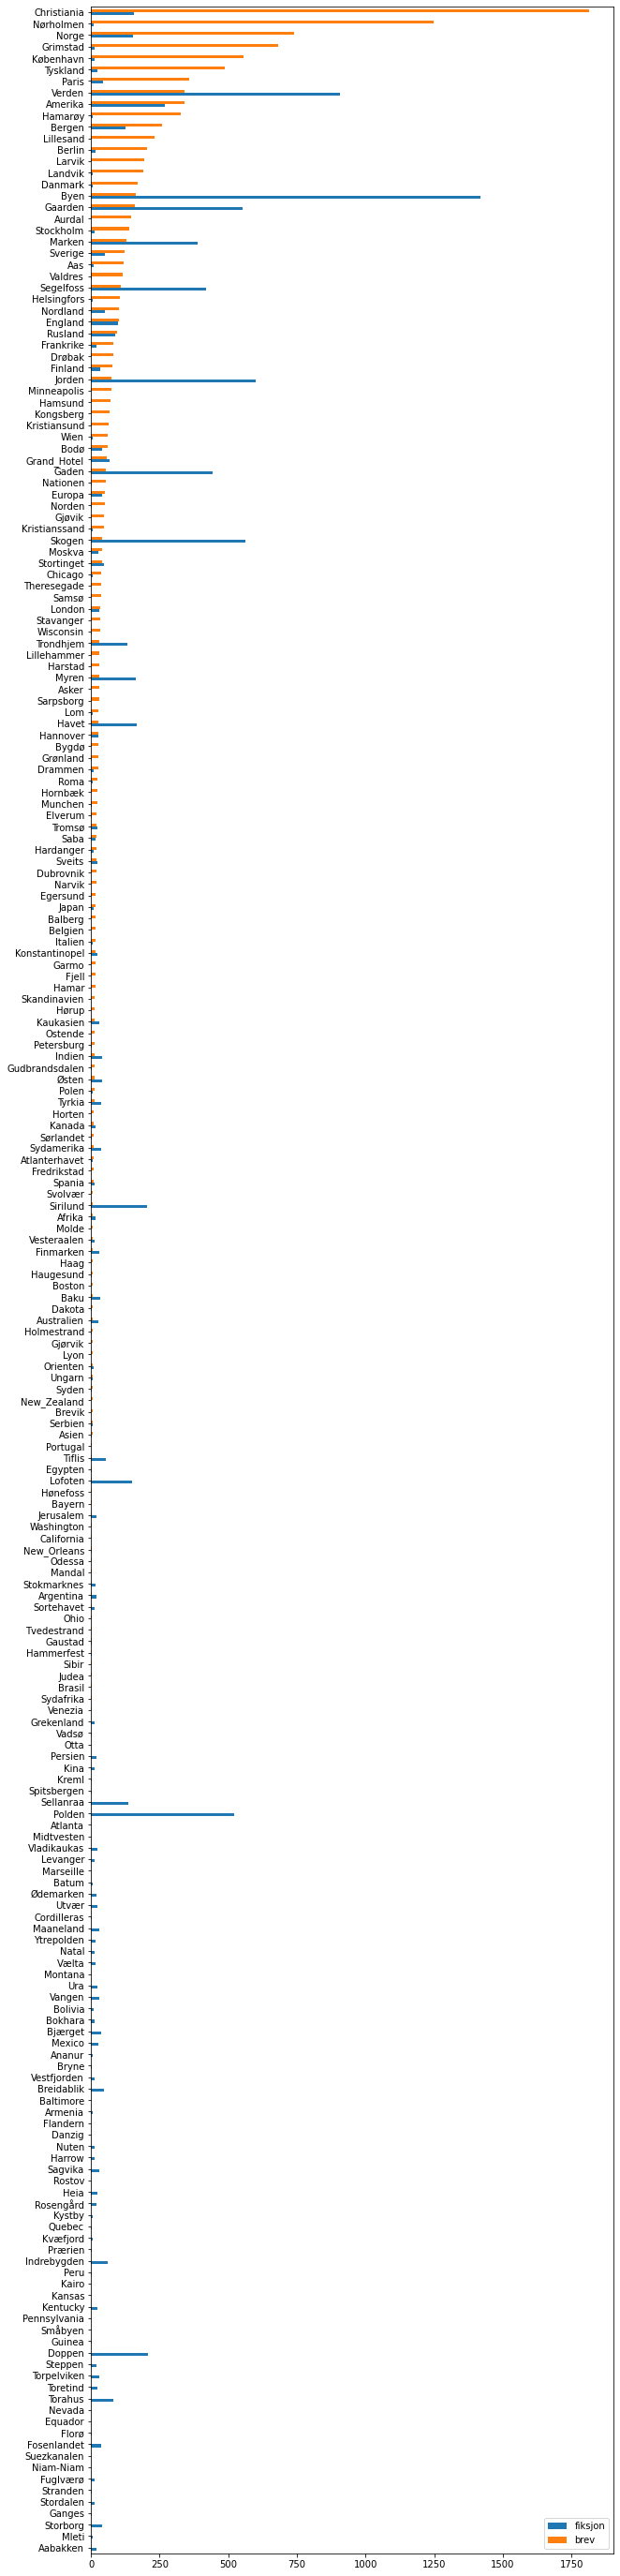

In [31]:
navnematrise[['fiksjon', 'brev']].sort_values(by='brev', ascending=True).plot(kind='barh', figsize=(10, 50))
plt.savefig('hamsun_steder_fiksjon_brev.jpg')

# gjør om til kode for å kjøre på nytt
m = []
for n in navn.index:
    m += [geo_info(n, pi) for pi in place_info(n)]

In [32]:
import dhlab.token_map as tm

In [33]:
#df = pd.DataFrame(m)
df = pd.read_csv('hamsun_geo_tagged.csv')

In [34]:
df.columns

Index(['Unnamed: 0', 'ISO_3166-1_alpha-2', 'ISO_3166-1_alpha-3', '_name',
       '_type', 'administrative', 'aerodrome', 'allotments',
       'archaeological_site', 'arts_centre',
       ...
       'supermarket', 'taxi', 'town', 'toys', 'travel_agency', 'university',
       'unknown', 'viewpoint', 'village', 'water'],
      dtype='object', length=102)

In [35]:
hw = list(set(df["_name"]))

In [36]:
import dhlab.nbtext as nb

In [37]:
df = df[["_name", "country", "postcode", "_type", "lat", "lng"]]

In [38]:
edits = qg.show_grid(df, show_toolbar = True)
edits

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [39]:
test = edits.get_changed_df()
test

,_name,country,postcode,_type,lat,lng
0,Arendal,Norway,NaN,county,58.426730,8.946949
1,Arendal,Norway,4836,city,58.459641,8.766602
2,Arendal,Sweden,NaN,neighbourhood,57.706883,11.835207
3,Arendal,Sweden,457 91,village,58.742534,11.275910
4,Arendal,Norway,1747,farm,59.156559,11.131137
...,...,...,...,...,...,...
1544,Ganges,Austria,9611,peak,46.601835,13.652567
1545,Ganges,USA,44878,village,40.906167,-82.561283
1546,Ganges,USA,NaN,village,42.577606,-86.210013
1547,Kvæfjord,Norway,NaN,county,68.687555,16.092226


In [40]:
steder_disambig = edits.get_changed_df()
steder_disambig

,_name,country,postcode,_type,lat,lng
0,Arendal,Norway,NaN,county,58.426730,8.946949
1,Arendal,Norway,4836,city,58.459641,8.766602
2,Arendal,Sweden,NaN,neighbourhood,57.706883,11.835207
3,Arendal,Sweden,457 91,village,58.742534,11.275910
4,Arendal,Norway,1747,farm,59.156559,11.131137
...,...,...,...,...,...,...
1544,Ganges,Austria,9611,peak,46.601835,13.652567
1545,Ganges,USA,44878,village,40.906167,-82.561283
1546,Ganges,USA,NaN,village,42.577606,-86.210013
1547,Kvæfjord,Norway,NaN,county,68.687555,16.092226


In [41]:
#pd.DataFrame(m).to_csv('hamsun_geo_tagged.csv')

In [42]:
steder_disambig.to_csv('disambiguerte_steder_hamsun_feb_2020.csv')

In [43]:
steder_disambig = pd.read_csv('disambiguerte_steder_hamsun.csv')

In [44]:
from scipy.special import softmax

In [45]:
#hamsun_names.to_csv('hamsun_steder_frekvens.csv')

# Se på kartet

Her kan vi gjøre betydelig mer, men selve geotaggingen går greit. 

In [46]:
stedsinfo = steder_disambig[['_name', 'lat','lng', 'country', '_type']]

In [47]:
stedsinfo

,_name,lat,lng,country,_type
0,Arendal,58.459641,8.766602,Norway,city
1,Argentina,-34.996496,-64.967282,Argentina,country
2,Asker,59.838578,10.457773,Norway,county
3,Aurdal,60.924233,9.415942,Norway,village
4,Baku,40.375443,49.832675,Azerbaijan,city
...,...,...,...,...,...
163,Rostov,57.186013,39.424956,Russia,city
164,Sibir,60.000000,100.000000,Russia,county
165,Odessa,46.487319,30.739278,Ukraine,city
166,Ganges,25.605269,83.703847,India,river


In [48]:
steder = dict()
for _, row in stedsinfo.iterrows():
    steder[row['_name']] = {'latlong': [row['lat'], row['lng']],
                            'type': row['_type']}
steder

{'Arendal': {'latlong': [58.4596408, 8.7666023], 'type': 'city'},
 'Argentina': {'latlong': [-34.9964963, -64.9672817], 'type': 'country'},
 'Asker': {'latlong': [59.8385784, 10.4577725], 'type': 'county'},
 'Aurdal': {'latlong': [60.92423270000001, 9.4159418], 'type': 'village'},
 'Baku': {'latlong': [40.3754434, 49.8326748], 'type': 'city'},
 'Balberg': {'latlong': [61.1556321, 10.4227683], 'type': 'village'},
 'Bergen': {'latlong': [60.39430550000001, 5.3259192], 'type': 'city'},
 'Bjærget': {'latlong': [57.10547, 8.99315], 'type': 'city'},
 'Bodø': {'latlong': [67.28394759999999, 14.3825834], 'type': 'city'},
 'Bokhara': {'latlong': [26.3588905, 85.6512634], 'type': 'county'},
 'Boston': {'latlong': [42.3602534, -71.0582912], 'type': 'city'},
 'Breidablik': {'latlong': [60.6110083, 6.4209861], 'type': 'farm'},
 'Bygdø': {'latlong': [59.90715229999999, 10.6796457], 'type': 'road'},
 'Chicago': {'latlong': [41.87556160000001, -87.6244212], 'type': 'city'},
 'Christiania': {'latlong':

In [49]:
steder

{'Arendal': {'latlong': [58.4596408, 8.7666023], 'type': 'city'},
 'Argentina': {'latlong': [-34.9964963, -64.9672817], 'type': 'country'},
 'Asker': {'latlong': [59.8385784, 10.4577725], 'type': 'county'},
 'Aurdal': {'latlong': [60.92423270000001, 9.4159418], 'type': 'village'},
 'Baku': {'latlong': [40.3754434, 49.8326748], 'type': 'city'},
 'Balberg': {'latlong': [61.1556321, 10.4227683], 'type': 'village'},
 'Bergen': {'latlong': [60.39430550000001, 5.3259192], 'type': 'city'},
 'Bjærget': {'latlong': [57.10547, 8.99315], 'type': 'city'},
 'Bodø': {'latlong': [67.28394759999999, 14.3825834], 'type': 'city'},
 'Bokhara': {'latlong': [26.3588905, 85.6512634], 'type': 'county'},
 'Boston': {'latlong': [42.3602534, -71.0582912], 'type': 'city'},
 'Breidablik': {'latlong': [60.6110083, 6.4209861], 'type': 'farm'},
 'Bygdø': {'latlong': [59.90715229999999, 10.6796457], 'type': 'road'},
 'Chicago': {'latlong': [41.87556160000001, -87.6244212], 'type': 'city'},
 'Christiania': {'latlong':

In [51]:
def delta(steder):
    from random import random
    copy = steder.copy()
    for x in steder:
        copy[x] = steder[x].copy()
        copy[x]['latlong'] = steder[x]['latlong'].copy()
        copy[x]['latlong'][0] = steder[x]['latlong'][0]
        copy[x]['latlong'][1] = steder[x]['latlong'][1]
    return copy

In [52]:
delta(steder)

{'Arendal': {'latlong': [58.4596408, 8.7666023], 'type': 'city'},
 'Argentina': {'latlong': [-34.9964963, -64.9672817], 'type': 'country'},
 'Asker': {'latlong': [59.8385784, 10.4577725], 'type': 'county'},
 'Aurdal': {'latlong': [60.92423270000001, 9.4159418], 'type': 'village'},
 'Baku': {'latlong': [40.3754434, 49.8326748], 'type': 'city'},
 'Balberg': {'latlong': [61.1556321, 10.4227683], 'type': 'village'},
 'Bergen': {'latlong': [60.39430550000001, 5.3259192], 'type': 'city'},
 'Bjærget': {'latlong': [57.10547, 8.99315], 'type': 'city'},
 'Bodø': {'latlong': [67.28394759999999, 14.3825834], 'type': 'city'},
 'Bokhara': {'latlong': [26.3588905, 85.6512634], 'type': 'county'},
 'Boston': {'latlong': [42.3602534, -71.0582912], 'type': 'city'},
 'Breidablik': {'latlong': [60.6110083, 6.4209861], 'type': 'farm'},
 'Bygdø': {'latlong': [59.90715229999999, 10.6796457], 'type': 'road'},
 'Chicago': {'latlong': [41.87556160000001, -87.6244212], 'type': 'city'},
 'Christiania': {'latlong':

In [53]:
from random import random

In [54]:
random()

0.8242569134966095

In [55]:
print(delta(steder)['Arendal'], steder['Arendal'])

{'latlong': [58.4596408, 8.7666023], 'type': 'city'} {'latlong': [58.4596408, 8.7666023], 'type': 'city'}


In [56]:
delta = lambda x: x

In [57]:
brev = {x:delta(steder)[x] for x in hamsun_brev if x in steder}

In [58]:
fiksjon = {x:delta(steder)[x] for x in hamsun_fiksjon if x in steder}

In [59]:
sakpros = {x:delta(steder)[x] for x in hamsun_sakprosa if x in steder}

In [60]:
hamsun_all = {x:hamsun_all[x] for x in hamsun_all if x in steder}

In [61]:
print(steder['Arendal'])
print(delta(steder)['Arendal'])


{'latlong': [58.4596408, 8.7666023], 'type': 'city'}
{'latlong': [58.4596408, 8.7666023], 'type': 'city'}


In [62]:
def normalise_json(struct):
    tot = sum(struct.values())
    for x in struct:
        struct[x] = struct[x]/tot
    return struct

In [63]:
verden = geokart_circles(steder, normalise_json(hamsun_all), thickness=6, radius=300000)
verden

In [65]:
verden.save('hamsuns_verden.html')

In [66]:
verden = geokart_circles(steder, normalise_json(hamsun_all), thickness=8, radius=300000)
layered = add_layer(brev, verden, normalise_json(hamsun_brev), 'brev', color='red', radius=300000, thickness = 8)
all_layers = add_layer(fiksjon, layered, normalise_json(hamsun_fiksjon), 'fiksjon', color='green', radius=100000, thickness= 8)
final_layers = add_layer(fiksjon, all_layers, normalise_json(hamsun_sakprosa), 'sakprosa', color='yellow', radius=200000, thickness= 8)


folium.LayerControl().add_to(all_layers)

In [67]:
final_layers

In [68]:
final_layers.save('hamsun_brev_fiksjon_sak.html')

In [69]:
all_layers = add_layer(norske_fiksjon, layered, normalise_json(hamsun_fiksjon), name='fiksjon', color='yellow')
folium.LayerControl().add_to(all_layers)

NameError: name 'norske_fiksjon' is not defined

In [70]:
all_layers

In [ ]:
all_layers.save('hamsun_steder_lagvis.html')

In [ ]:
geokart_circles(norske).save('circles.html')

In [ ]:
krt.save('kart.html')

In [ ]:
nor = pgeo.Nominatim('no')

In [ ]:
nor.query_location("oslo")

In [ ]:
nor.query_postal_code("0271")

In [ ]:
opencage_api = "a8e2de88b5b64323a9b7668a0ee6e7b6"

In [ ]:
koord("trondheim")

In [ ]:
res = place_info("Hammerfest")
len(res)

In [ ]:
[(r['components'], r['geometry']) for r in res]

In [ ]:
results[0]['geometry']

In [ ]:
results[0]["components"]["_type"]

In [ ]:
import pandas as pd

In [ ]:
pd.DataFrame(results)

In [ ]:
import utm
utm.to_latlon(340000, 5710000, 32, 'U')
(51.51852098408468, 6.693872395145327)

In [ ]:
from convertbng.util import convert_bng, convert_lonlat,convert_etrs89_to_lonlat,convert_epsg3857_to_wgs84


In [ ]:
for x in koord('Tromsø', 'By'):
    e = float(x[1])
    n = float(x[2])
    print(e, n)
    (a, b) = (utm.to_latlon(e, n, 32,  'u'))
    print((a,b))
